# Задание 14. Кодирование чисел. Системы счисления

Для решения задач этого раздела нам понадобится:

- переводить числа из системы счисления с основанием $n$ в десятичную.
В этом поможет функция `int()`

- переводить числа из десятичной системы счисления в систему с основанием $n$. В этом помогут функции `bin()`, `oct()` и `hex()` для двоичной, восьмеричной и шестнадцатеричной системы счисления и своя функция для остальных $n$.  

Рассмотрим число $$\color{green}{2534}_7 = \color{green}{2} \cdot 7^3 + 
\color{green}{5} \cdot 7^2 + \color{green}{3} \cdot 7^1 + \color{green}{4} \cdot 7^0 = \\
= 686 + 245 + 21 + 4 = \\
= 956$$

Чтобы перевести его в десятичную систему счисления мы можем передать функции `int()` два аргумента:

- строку, содержащую цивры семиричной записи числа $2534$, то есть `'2534'`

- число $7$, как основание системы счисления, в которой записан первый аргумент.

Получим:

In [10]:
int('2534', 7)

956

Проверим полученный результат:

In [9]:
2 * 7**3 + 5 * 7**2 + 3 * 7**1 + 4 * 7**0

956

Для систем счисления с основанием больше 10 в качестве недостающих цифр используются буквы латинского алфавита. Таким образом, можно использовать систему счисления максимум с 37 цифрами: $\{0,1,\dots 9, A, B, \dots Z\}$ 

In [28]:
int('BEC', 16)

3052

In [27]:
int('MORDOR2021', 30)

449372972124061

In [33]:
bin(377), oct(377), hex(377)

('0b101111001', '0o571', '0x179')

## Сложение и вычитание чисел в различных системах счисления

### Задача [7761](https://inf-ege.sdamgia.ru/problem?id=7761)

Сколько единиц содержится в двоичной записи значения выражения: $4^{2020} + 2^{2017} – 15$?

Представим результат этого выражения как разность двух выражений, являющихся суммами степеней числа $2$:

$$4^{2020} + 2^{2017} - 15 = (2^{4040} + 2^{2017}) - (2^3 + 2^2 + 2^1 + 2^0)$$

Это позволяет легко записать это выражение, как разность двух двоичных чисел:

$$ \overset{4040}{1}000\dots 00\overset{2017}{1}00 \dots 000_2 - 1111_2$$

Вычитание в столбик:

$$\frac{
    \begin{array}
      
      000 \dots 00000 \dots 001111 & 3
      \hline
    \end{array}
  }{
    \ \ \ \ \ 100 \dots 00011 \dots 110001
  }

$$


Эту задачу в Python можно решить в одну строчку кода благодаря поддержке [длинных чисел]() и готовой функции [bin()](https://docs.python.org/3/library/functions.html#bin), позволяющей получить строку с двоичным представлением числа.

In [ ]:
bin(364523784)

'0b10101101110100011000100001000'

In [ ]:
4**2020 + 2**2017 - 15

1449380728509242636642063582370388272996203706043638310108403304382543180755468027532987823534357194528291038918609377525430999875380158058523255692822358617269314052444381666268582428878075205483971874004045435649879357053179275074506391746610149153652324789256782977641241428795768910068414405933331963470099472380938892804229247743539128663036701723844134433592837763520115614024292294098209287675068973000166010887010733957417497516761711696452875168667202900525681787210589964815429590215591043722939066887266968366182369486480359146769997374706385672190220987929310144590491768873969292675905334403369245229457314374101871332310172249187520272254486400710463136218003545603104624912012893651445929561730952831845002575494270582413994485402844605921226406074859591254161409363511010057497509158184544972468475048996830532823348290705036379523599167257317104555782072290963263637182029024450950439196058992359097774818174469719149530296364677124851525188117514260281116960760868276023961737266080

In [1]:
print(bin(4**2020 + 2**2017 - 15))

0b10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

In [ ]:
bin(4**2020 + 2**2017 - 15).count('1')

2015

In [ ]:
bin(4**2020 + 2**2017 - 15).count('0')-1

2026

In [ ]:
bin(465374)

'0b1110001100111011110'

In [ ]:
bin(465374)[2:]

'1110001100111011110'

In [ ]:
bin(4**2020 + 2**2017 - 15)[2:].count('0')

2026

Реализуем функцию со следующими свойствами:

```python
def to_nth(x: int, n: int=2) -> str:
```

Возвращает список цифр $n$-ичной записи числа $x$

**Аргументы**

$x$ : `int` &ndash; число для перевода

$n$ : `int, optional` &ndash; основание системы счисления (по умолчанию 2)
    
**Примеры**

```python
>>> to_nth(2**5 + 2**1)
[0, 1, 0, 0, 0, 1]

>>> to_nth(2**5 + 2**1, 5)
[4, 1, 1]

>>> to_nth(7**8 + 7**7 + 7**1, 7)
['1', '1', '0', '0', '0', '0', '0', '1', '0']

```




    

In [11]:
def to_nth(x, n=2):
    digits = []
    while x > 0:
        digits.append(x % n)
        x //= n
    
    return digits

In [ ]:
to_nth(2**5 + 2**1)

[0, 1, 0, 0, 0, 1]

In [ ]:
to_nth(2**5 + 2**1, 5)

[4, 1, 1]

In [ ]:
to_nth(7**8 + 7**7 + 7**1, 7)

[0, 1, 0, 0, 0, 0, 0, 1, 1]

In [ ]:
to_nth(7**8 + 7**7 + 7**1, 7).count(1)

3

Можно реализовать и немного расширенную версию такой функции. Описание поместим в docstring, благодаря которому в различных IDE мы сможем видеть красивое описание этой функции во время набора кода:


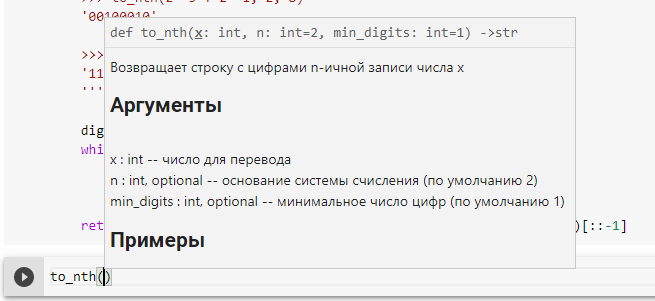

In [ ]:
def to_nth(x: int, n: int=2, min_digits: int=1) -> str:
    '''Возвращает строку с цифрами n-ичной записи числа x

    Аргументы
    ---------
    x : int -- число для перевода
    n : int, optional -- основание системы счисления (по умолчанию 2)
    min_digits : int, optional -- минимальное число цифр (по умолчанию 1) 

    Примеры
    -------
    >>> to_nth(2**5 + 2**1)
    '100010'

    >>> to_nth(2**5 + 2**1, 2, 8)
    '00100010'

    >>> to_nth(7**8 + 7**7 + 7**1, 7)
    '110000010'
    '''

    digits = []
    while x > 0:
        digits.append(x % n)
        x //= n
    
    return ''.join(map(str, digits + [0]*(min_digits - len(digits))))[::-1]

In [ ]:
def to_nth(x, n):
    num = []
    while x !=0:
        num.append(x % n)
        x //= n
    return num

print(to_nth(69, 3))

def f1(x, n):
    a = to_nth(x, n)
    b = a[::-1]
    s = ''
    for i in b:
        s += str(i)
    return s

print(f1(69, 3))

def f2(x, n):
    a = to_nth(x, n)
    b = a[::-1]
    
    s = ''.join([str(c) for c in b])
    return s

print(f2(69, 3))

def f3(x, n):
    a = to_nth(x, n)
    b = a[::-1]
    
    s = ''.join(map(str, b))
    return s

print(f3(69, 3))

print([str(c) for c in [1,2,3,4,5]])

print(map(str, [1,2,3,4,5]))

print(list(map(str, [1,2,3,4,5])))

def f4(x, n):
    return ''.join(map(str, to_nth(x, n)[::-1]))

a = list(range(1, 8))

print(a)
print(a[::-1])
print(a.reverse())
print(a)

for x in a:
    print(x)

for x in a[::-1]:
    print(x)

# for x in a.reverse():
#   print(x)

a.reverse()
for x in a: print(x); print(x**2)

def f5 (x, n):
    if x >= 0:
        return f4(x, n)
    return '-' + f4(-x, n)

print(f5(-545, 5))

## Определение основания

### Задача 

Решите уравнение: $121_x + 1_{10} = 101_7$

Ответ запишите в троичной системе (основание системы счисления в ответе писать не нужно)

In [ ]:
x = 3

int('121', x) + int('1', 10) == int('101', 7)

False

In [ ]:
x = 6

int('121', x) + int('1', 10) == int('101', 7)

True

In [ ]:
for x in range(3, 37):
    if int('121', x) + int('1', 10) == int('101', 7):
        print(x)
        break

6


In [ ]:
[x for x in range(3, 37) if int('121', x) + int('1', 10) == int('101', 7)][0]

6

### Задача

Чему равно наименьшее основание позиционной системы счисления $x$, при котором $225_x = 405_y$

In [ ]:
for x in range(6, 36):
    for y in range(6, 36):
        if int('225', x) == int('405', y):
            print(x, y)

8 6


### Задача

Запись числа $338$ в системе счисления с основанием $N$ содержит $3$ цифры и оканчивается на $2$. Чему равно максимально возможное основание системы счисления?

In [ ]:
for n in range(2, 11):
    x = to_nth(338, n)
    print(n, x)

2 [0, 1, 0, 0, 1, 0, 1, 0, 1]
3 [2, 1, 1, 0, 1, 1]
4 [2, 0, 1, 1, 1]
5 [3, 2, 3, 2]
6 [2, 2, 3, 1]
7 [2, 6, 6]
8 [2, 2, 5]
9 [5, 1, 4]
10 [8, 3, 3]


### Задача

В какой системе счисления выполняется равенство $12 \cdot 13 = 211$?

В ответе укажите число – основание системы счисления.

In [ ]:
for x in range(4, 37):
    if int('12', x) * int('13', x) == int('211', x):
        print(x)

5


### Задача

Запишите натуральное число, десятичная запись которого состоит из двух цифр, шестнадцатеричная запись заканчивается цифрой $A$, а пятеричная — цифрой $3$.

In [ ]:
def to_nth(x, n=2):
    digits = []
    while x > 0:
        digits.append(x % n)
        x //= n
    
    return digits

for x in range(10, 100):
    if to_nth(x, 16)[0] == int('A', 16) and to_nth(x, 5)[0] == 3:
        print(x) 

58


## Дополнительно